# Homework 4      Marc Manau
<p align="justify">Option 3 : Change the program of the Pi calculation using MonteCarlo

Implement one of the following improvements/changes to the Pi simulations:

https://github.com/jfaraudo/MonteCarlo-example

- Instead of calculating Pi, modify the program to calculate the volume of a sphere. Is the convergence better or worse than in the 2D case of a circle?

<p align="justify"> He triat l'opció número 3 que consisteix a modificar el programa que serveix per calcular el valor de pi per un altre que serveixi per calcular el volum d'una esfera seguint el mateix procediment de MonteCarlo. El programa que he fet servir és el que utilitzava el mètode de la cadena de Markov, anomenat com a Markov_chain_pi.ipynb que es pot trobar a https://github.com/jfaraudo/MonteCarlo-example.

<p align="justify"> He afegit certes comandes que afegeixen una dimensió extra que anomenem z per a construir l'esfera, aquesta dimensió espacial extra fa el mateix que les altres dos perquè continuem tenint, en aquest cas, una esfera de radi 1. Per això, seguim la mateixa estratègia de la cadena de Markov de fer diferents transicions d'estats a través d'un punt que va fent petits salts, a més a més hi han estats prohibits que corresponen als estats que cauen fora del cub i sumen un valor a l'estat anterior.

<p align="justify"> El mètode per a calcular el volum és molt semblant al del càlcul de pi, calculem la ràtio de punts que han quedat dintre de l'esfera respecte al nombre de punts totals que estan dintre del cub i ho multipliquem pel valor total del cub que en aquest cas és 8. El valor real de volum el traiem a partir de la fórmula clàssica del volum d'una esfera tenint en compte que el radi és 1, per tant, multipliquem 4/3 per pi.

<p align="justify"> Per fer la gràfica final he consultat la pàgina Stack Overflow i he seguit l'exemple que hi havia per a construir la gràfica de l'esfera i el cub on he posat les dades de tots els punts calculats pel programa. L'exemple que he fet servir es troba en el següent enllaç:

 https://stackoverflow.com/questions/11140163/plotting-a-3d-cube-a-sphere-and-a-vector

<p align="justify"> A continuació el codi de programació per calcular el volum d'una esfera basat en mètodes MonteCarlo.


Enter number of points for Monte Carlo estimate value of a sphere volume?
>100000

Enter size of jump (example 0.3): 
>0.3

--------------

Performance of calculation
Number of failed jumps (removed): 21053  ( 21.053 %)

Result

Number of points inside cube of volume 8: 100000
Number of points inside unit sphere: 52477
Ratio unit sphere/full cube= 52.477 %

Estimated volume of unit sphere = 0.52477 x Total volume = 4.19816
 Exact volume value: 4.1887902047863905

--------------


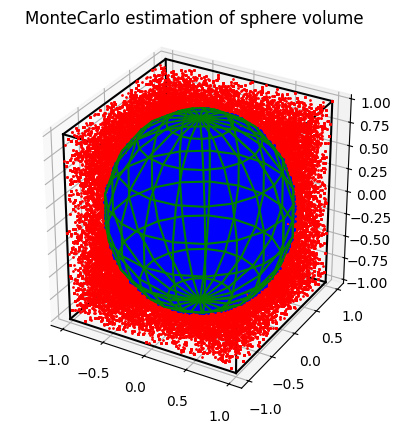

In [19]:
# Primet de tot, importem les llibreries necessàries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations

# Posem l'input del nombre total de punts que volem fer servir
total_random_points = int(input("\nEnter number of points for Monte Carlo estimate value of a sphere volume?\n>"))

# Posem l'input dels salts que tindran els punts en les transicions
delta = float(input("\nEnter size of jump (example 0.3): \n>"))

# Iniciem els comptadors dels punts que cauen dintre del cub, de l'esfera i dels que van fora
inside_sphere = 0
inside_cube = 0
outside = 0

#Creació de llistes per guardar els valors de x, y i z dels punts dintre del cub, però fora de l'esfera
xc = []
yc = []
zc = []

#Creació de llistes per guardar els valors de x, y i z dels punts que estan dintre de l'esfera
xs = []
ys = []
zs = []
#---------------------------------------------------
#Càlculs

#Posició inicial
x=1.0
y=1.0
z=1.0

while (inside_cube<total_random_points):

    #Generació d'un salt aleatori 3D amb el valor de delta introduït
    del_x = np.random.uniform(-delta, delta)
    del_y = np.random.uniform(-delta, delta)
    del_z = np.random.uniform(-delta, delta)

    #Comprovació de què el nou estat està dintre del cub, si no és el cas, el salt es torna zero
    if abs(x+del_x) > 1.0 or abs(y+del_y) > 1.0 or abs(z+del_z) > 1.0:
        outside = outside +1
        del_x = 0.0
        del_y = 0.0
        del_z = 0.0

    #Actualitza el nombre de punts dintre del cub i actualitza la nova posició inicial
    inside_cube = inside_cube +1
    x = x + del_x
    y = y + del_y
    z = z + del_z

    # Comprovació de si el punt està dintre de l'esfera, si és el cas, s'ha de tenir en compte per la representació
    if x**2 + y**2 + z**2 <= 1.0:
        inside_sphere = inside_sphere +1
        xs.append(x)
        ys.append(y)
        zs.append(z)
    else:
        xc.append(x)
        yc.append(y)
        zc.append(z)
#---------------------------------------------------

# Estadístiques

# Nombre de punts dintre de l'esfera en comparació amb el nombre total de punts
sphere_ratio = inside_sphere /  inside_cube

#Aproximació del volum total de l'esfera fent servir la ràtio dels punts que estan dintre de l'esfera respecte a un cub de volum 8.0
Volume_approx = 8.0*sphere_ratio

# Resultats del càlcul
print('\n--------------')
print('\nPerformance of calculation')
print('Number of failed jumps (removed):',outside,' (',100*outside/inside_cube,'%)')
print('\nResult')
print('\nNumber of points inside cube of volume 8:', inside_cube)
print('Number of points inside unit sphere:',inside_sphere,)
print('Ratio unit sphere/full cube=',sphere_ratio*100,'%')
print('\nEstimated volume of unit sphere =',sphere_ratio,'x Total volume =', Volume_approx)
print(' Exact volume value:', np.pi*(4/3))
print('\n--------------')

#Gràfica

#Crreació dels gràfics 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect("equal")

# Dibuix del cub
r = [-1, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s, e), color="k")

# Dibuix de l'esfera
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="g")

#Creació del gràfic amb el títol i les dades del càlcul del programa
plt.plot(xc,yc,zc,'ro',markersize=1.0)
plt.plot(xs,ys,zs,'bo',markersize=1.0)
plt.title('MonteCarlo estimation of sphere volume')


#Ensenya el gràfic
plt.show()

<p align="justify">Com podem veure obtenim un valor aproximat que s'apropa bastant al valor real del volum d'una esfera de radi 1. Per tant, el programa funciona bé i dona una bona aproximació si posem un nombre de punts bastant alt i un salt adequat per a les transicions. Si comparem el rendiment respecte al programa original del càlcul de pi (Markov_chain_pi.ipynb), podem comprovar que tenen convergències similars, ja que els resultats no varien molt, només fallen uns pocs decimals respecte al nombre exacte. També, com estem generant valors aleatoris no tots els intents seran iguals encara que posem les mateixes condicions, hi haurà que s'apropin més i altres que s'apropin menys.

<p align="justify">Per tant, la diferència de la divergència entre els dos casos és molt petita, però, com hi ha una dimensió extra en el cas de l'esfera és més complicat quadrar els punts en alguns intents i el valor s'allunya més del valor real, i per això, la seva convergència és una mica pitjor. En conclusió, si posem les mateixes condicions de nombre de punts i de valor de salt, el programa amb el càlcul de pi sol apropar-se més, perquè té una dimensió menys. En qualsevol cas, com estem generant punts aleatoris, qualsevol intent pot donar millors resultats que un altre. També s'ha de tenir en compte que l'esfera necessitarà més punts per donar un valor més exacte perquè hi caben molts més punts que no en el cas de la circumferència. En general, els dos programes funcionen bé seguint el mètode de la cadena de Markov.